In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(os.path.join("..", "data", "merged_output", "Comal_J17_J27.csv"))
df.set_index(pd.to_datetime(df['datetime']), inplace=True)
del df['datetime']
df.head()

,Comal River,Comal Rv (nc),Comal Rv (oc),springflow,MaxLevel_J17,MaxLevel_J27
datetime,,,,,,
2014-05-06,116.0,61.9,50.7,118.0,632.095,830.749
2014-05-07,116.0,54.1,50.1,116.0,631.673,830.637
2014-05-08,113.0,52.2,51.3,115.0,631.839,830.498
2014-05-09,118.0,54.1,52.6,115.0,632.492,830.361
2014-05-10,113.0,52.2,53.2,116.0,633.265,830.352


In [3]:
X, y = np.array(df['Comal River'].tolist()), np.array(df['MaxLevel_J27'].tolist()) # make these list like arrays

In [4]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=123)

train_X = train_X.reshape(-1, 1)
test_X  = test_X.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)
test_y  = test_y.reshape(-1, 1)

print("Labels for training and testing data")
print("Train X shape: ", train_X.shape)
print("Train Y shape: ", train_y.shape)
print("Test  X shape: ", test_X.shape)
print("Test  Y shape: ", test_y.shape)

Labels for training and testing data
Train X shape:  (789, 1)
Train Y shape:  (789, 1)
Test  X shape:  (790, 1)
Test  Y shape:  (790, 1)


In [5]:
k = 20 
knn = KNeighborsRegressor(n_neighbors=k) 
knn.fit(train_X, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=2,
          weights='uniform')

In [6]:
future_j27 = [[200]] # Springflow at Comal Springs
future_j27 = np.array(future_j27)

In [7]:
y_pred = knn.predict(future_j27)
print(y_pred)

[[850.82]]


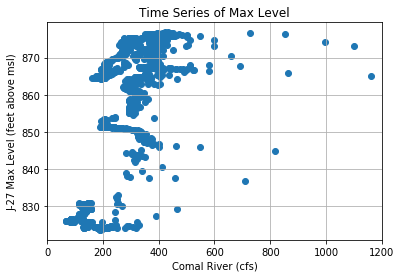

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1200)
plt.scatter(df['Comal River'], df['MaxLevel_J27'])
ax.set_title('Time Series of Max Level')
ax.set_xlabel("Comal River (cfs)")
ax.set_ylabel("J-27 Max Level (feet above msl)")
ax.grid()
plt.savefig(os.path.join("..", "img", "J27_Comal_corr.png"))
plt.show()